In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("NIFTY50.csv")


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline



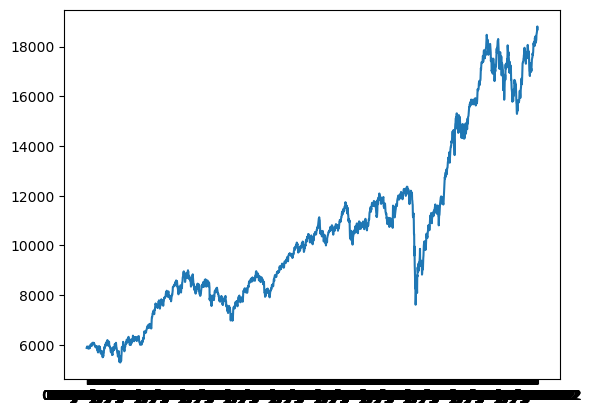

In [11]:
plt.plot(df["Date"],df["Close"])

In [13]:
!pip3 install scipy


In [58]:
from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample

# np.random.seed(0)
# rs = np.random.randn(200)
# xs = [0]
# for r in rs:
#     xs.append(xs[-1] * 0.9 + r)

df = pd.DataFrame(df,columns=['Close'])

n = 1  # number of points to be checked before and after

# Find local peaks
# print(df)
df['min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal,
                    order=n)[0]]['Close']
df['max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal,
                    order=n)[0]]['Close']

# Plot results
plt.figure(figsize=(100,100))

plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['Close'])

plt.savefig('books_read.png')
plt.show()


In [12]:
print(df.shape[0]-2)

2473


In [13]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance
     

In [14]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))
     



In [15]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()
     

NameError: name 'candlestick_ohlc' is not defined

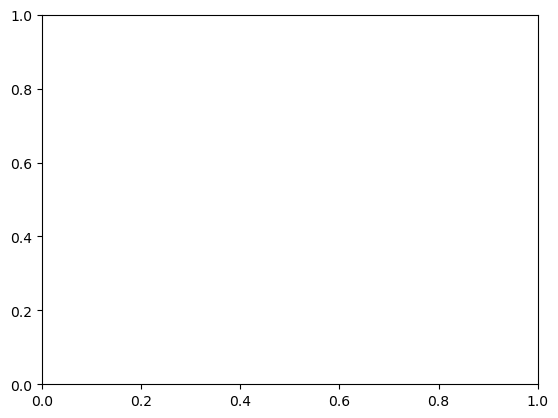

In [16]:
plot_all()
